In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

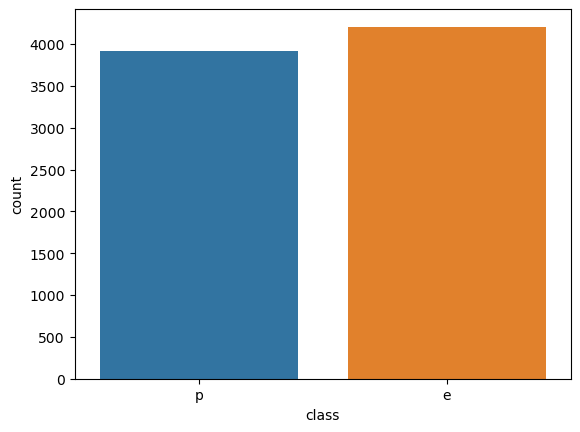

In [3]:
sns.countplot(data=df,x='class')

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
unique_features = df.describe().transpose().sort_values('unique')

<AxesSubplot:ylabel='unique'>

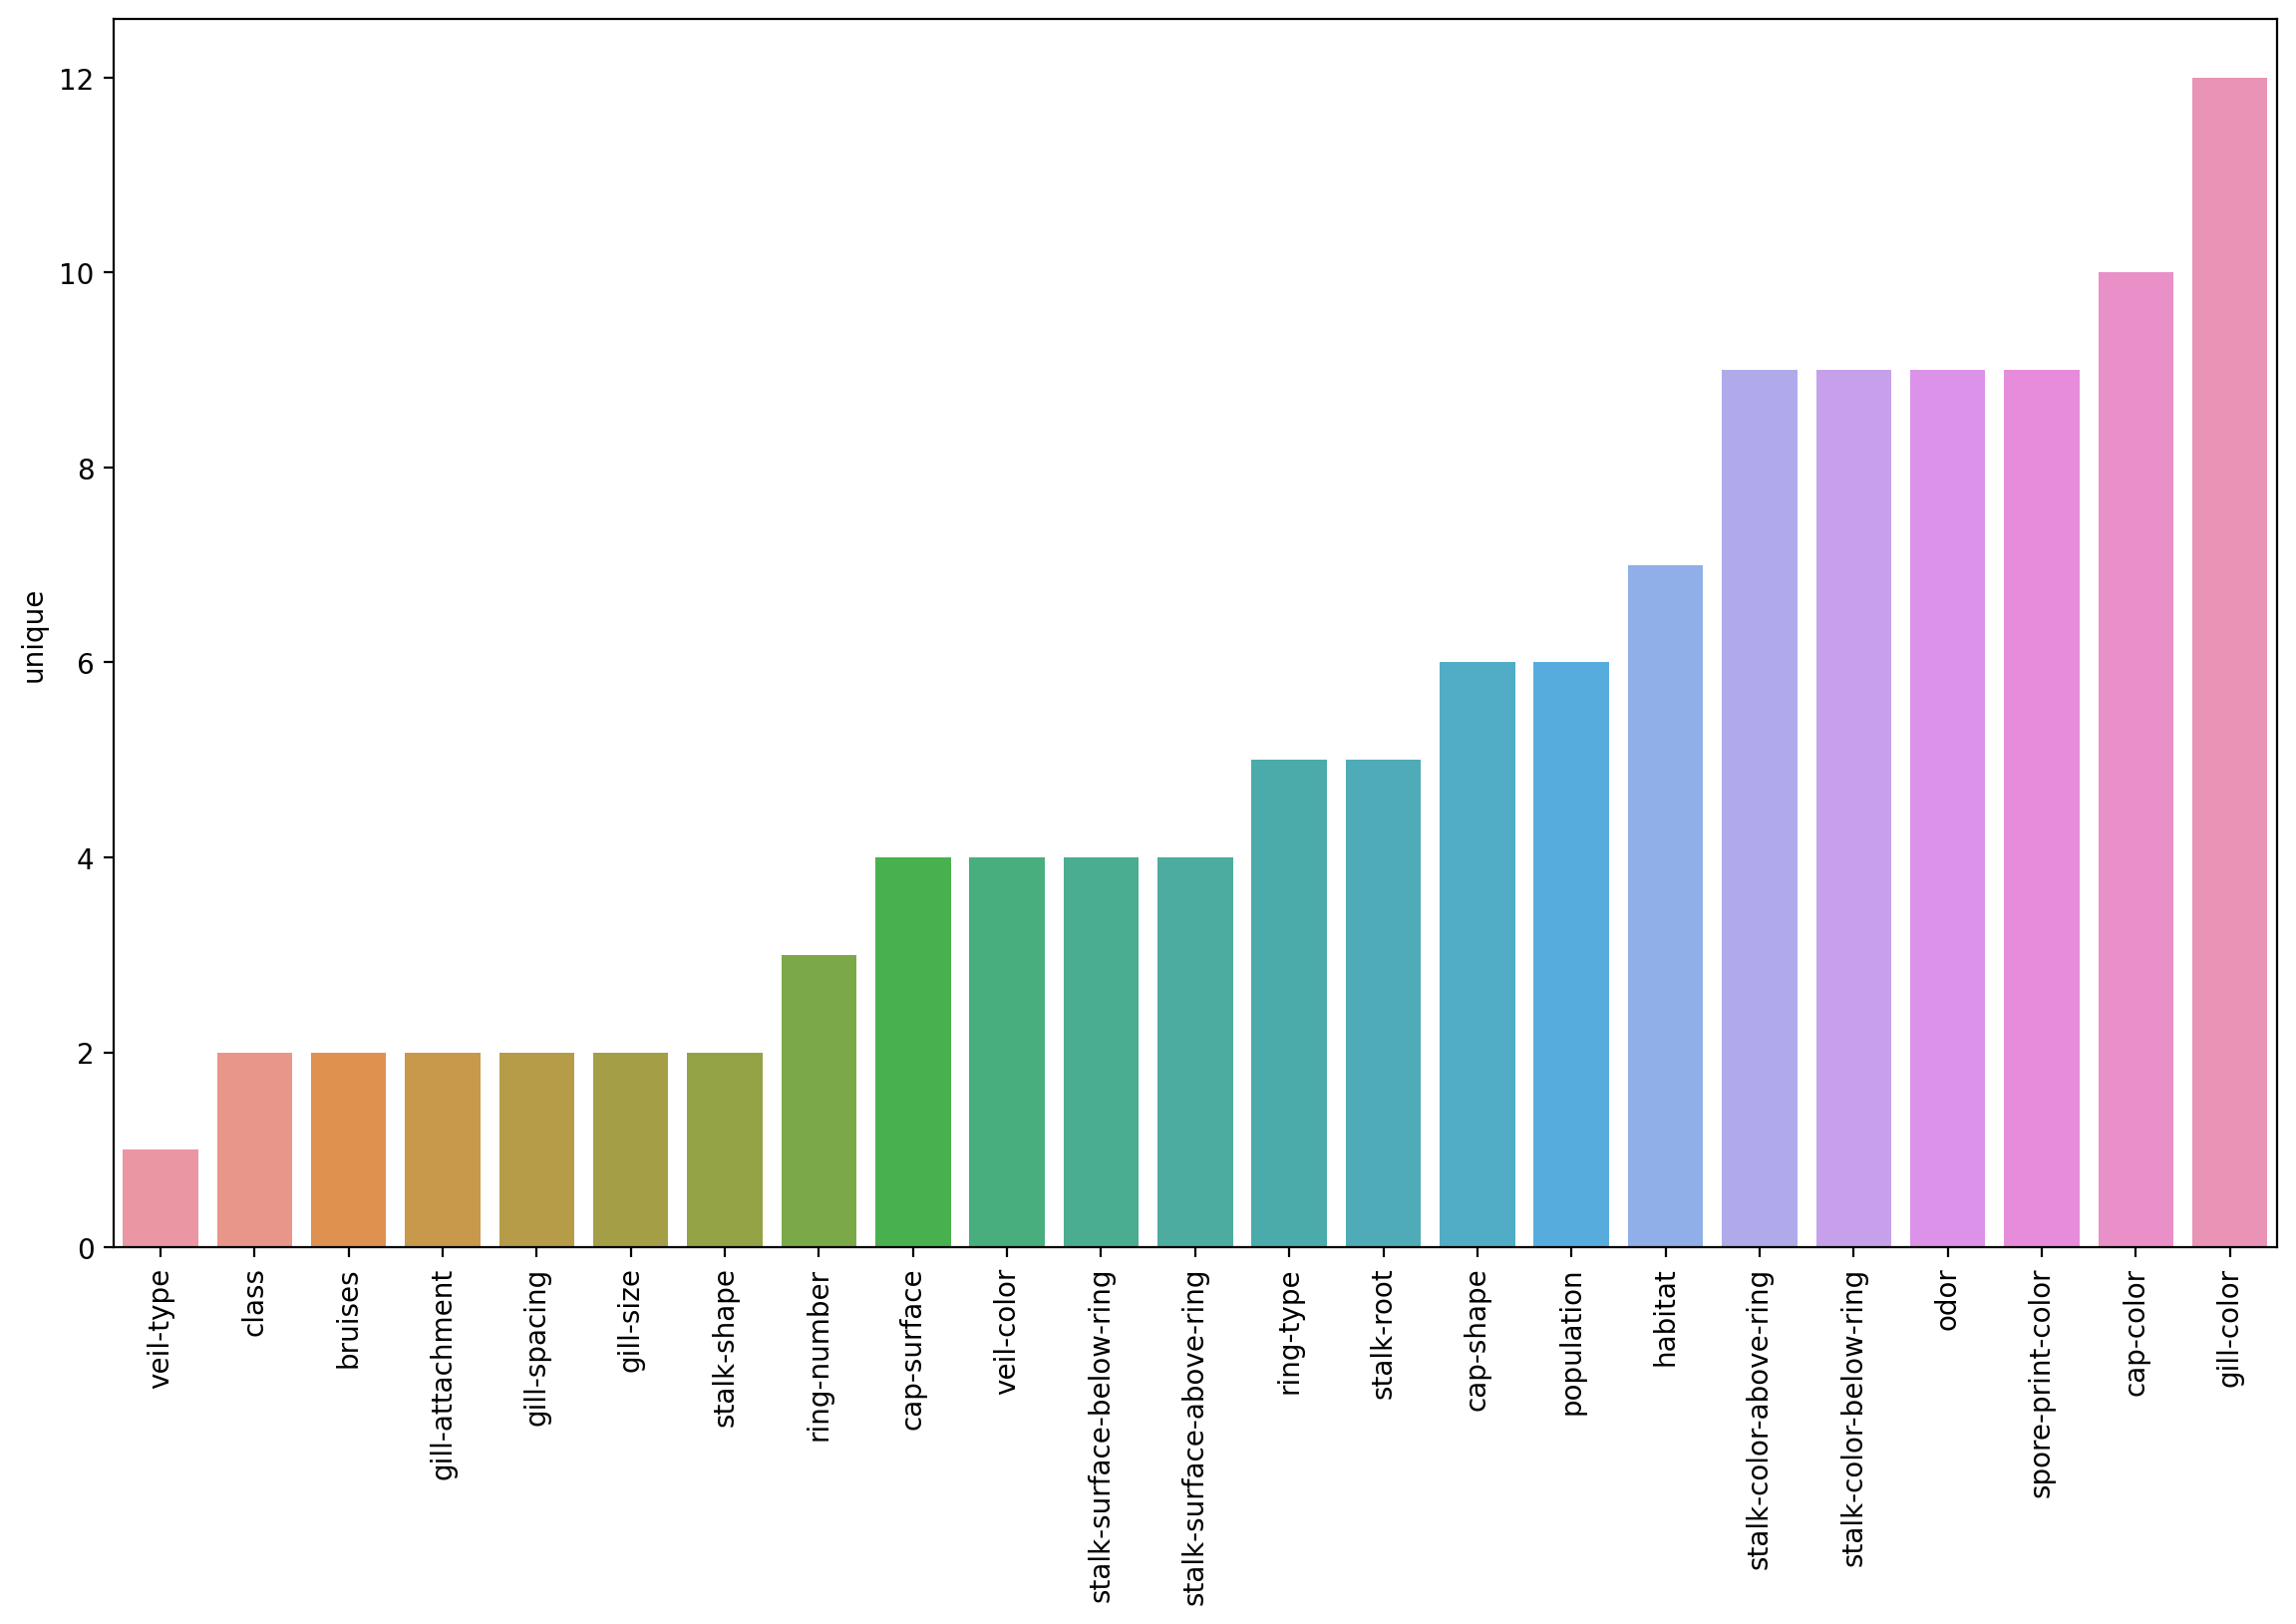

In [9]:
plt.figure(figsize=(14,8),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=unique_features,x=unique_features.index,y='unique')

In [10]:
X = df.drop('class',axis=1)
y = df['class']

In [14]:
X = pd.get_dummies(X,drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [19]:
len(X_train) + len(X_test)

8124

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
model = AdaBoostClassifier(n_estimators=1)

In [22]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [23]:
p = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [25]:
accuracy_score(y_test,p)

0.8777686628383922

In [26]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [27]:
    model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
model.feature_importances_.argmax()

22

In [30]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

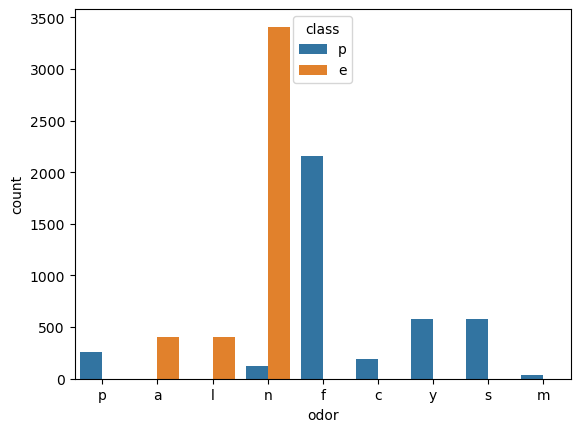

In [34]:
sns.countplot(data=df,x='odor',hue='class')

In [36]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    p = model.predict(X_test)
    a = accuracy_score(y_test,p)
    error = 1 - a
    error_rates.append(error)

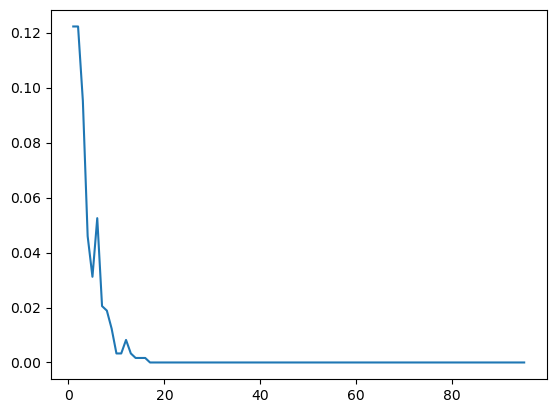

In [41]:
plt.plot(range(1,96),error_rates)

In [42]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [48]:
features = pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=['Importance'])
imp = features[features['Importance'] > 0]
imp

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'cap-color_c'),
  Text(1, 0, 'cap-color_n'),
  Text(2, 0, 'cap-color_w'),
  Text(3, 0, 'bruises_t'),
  Text(4, 0, 'odor_c'),
  Text(5, 0, 'odor_f'),
  Text(6, 0, 'odor_n'),
  Text(7, 0, 'odor_p'),
  Text(8, 0, 'gill-spacing_w'),
  Text(9, 0, 'gill-size_n'),
  Text(10, 0, 'stalk-shape_t'),
  Text(11, 0, 'stalk-root_b'),
  Text(12, 0, 'stalk-surface-above-ring_k'),
  Text(13, 0, 'stalk-surface-below-ring_y'),
  Text(14, 0, 'stalk-color-below-ring_n'),
  Text(15, 0, 'stalk-color-below-ring_w'),
  Text(16, 0, 'ring-number_t'),
  Text(17, 0, 'spore-print-color_r'),
  Text(18, 0, 'spore-print-color_w'),
  Text(19, 0, 'population_c'),
  Text(20, 0, 'population_v'),
  Text(21, 0, 'habitat_w')])

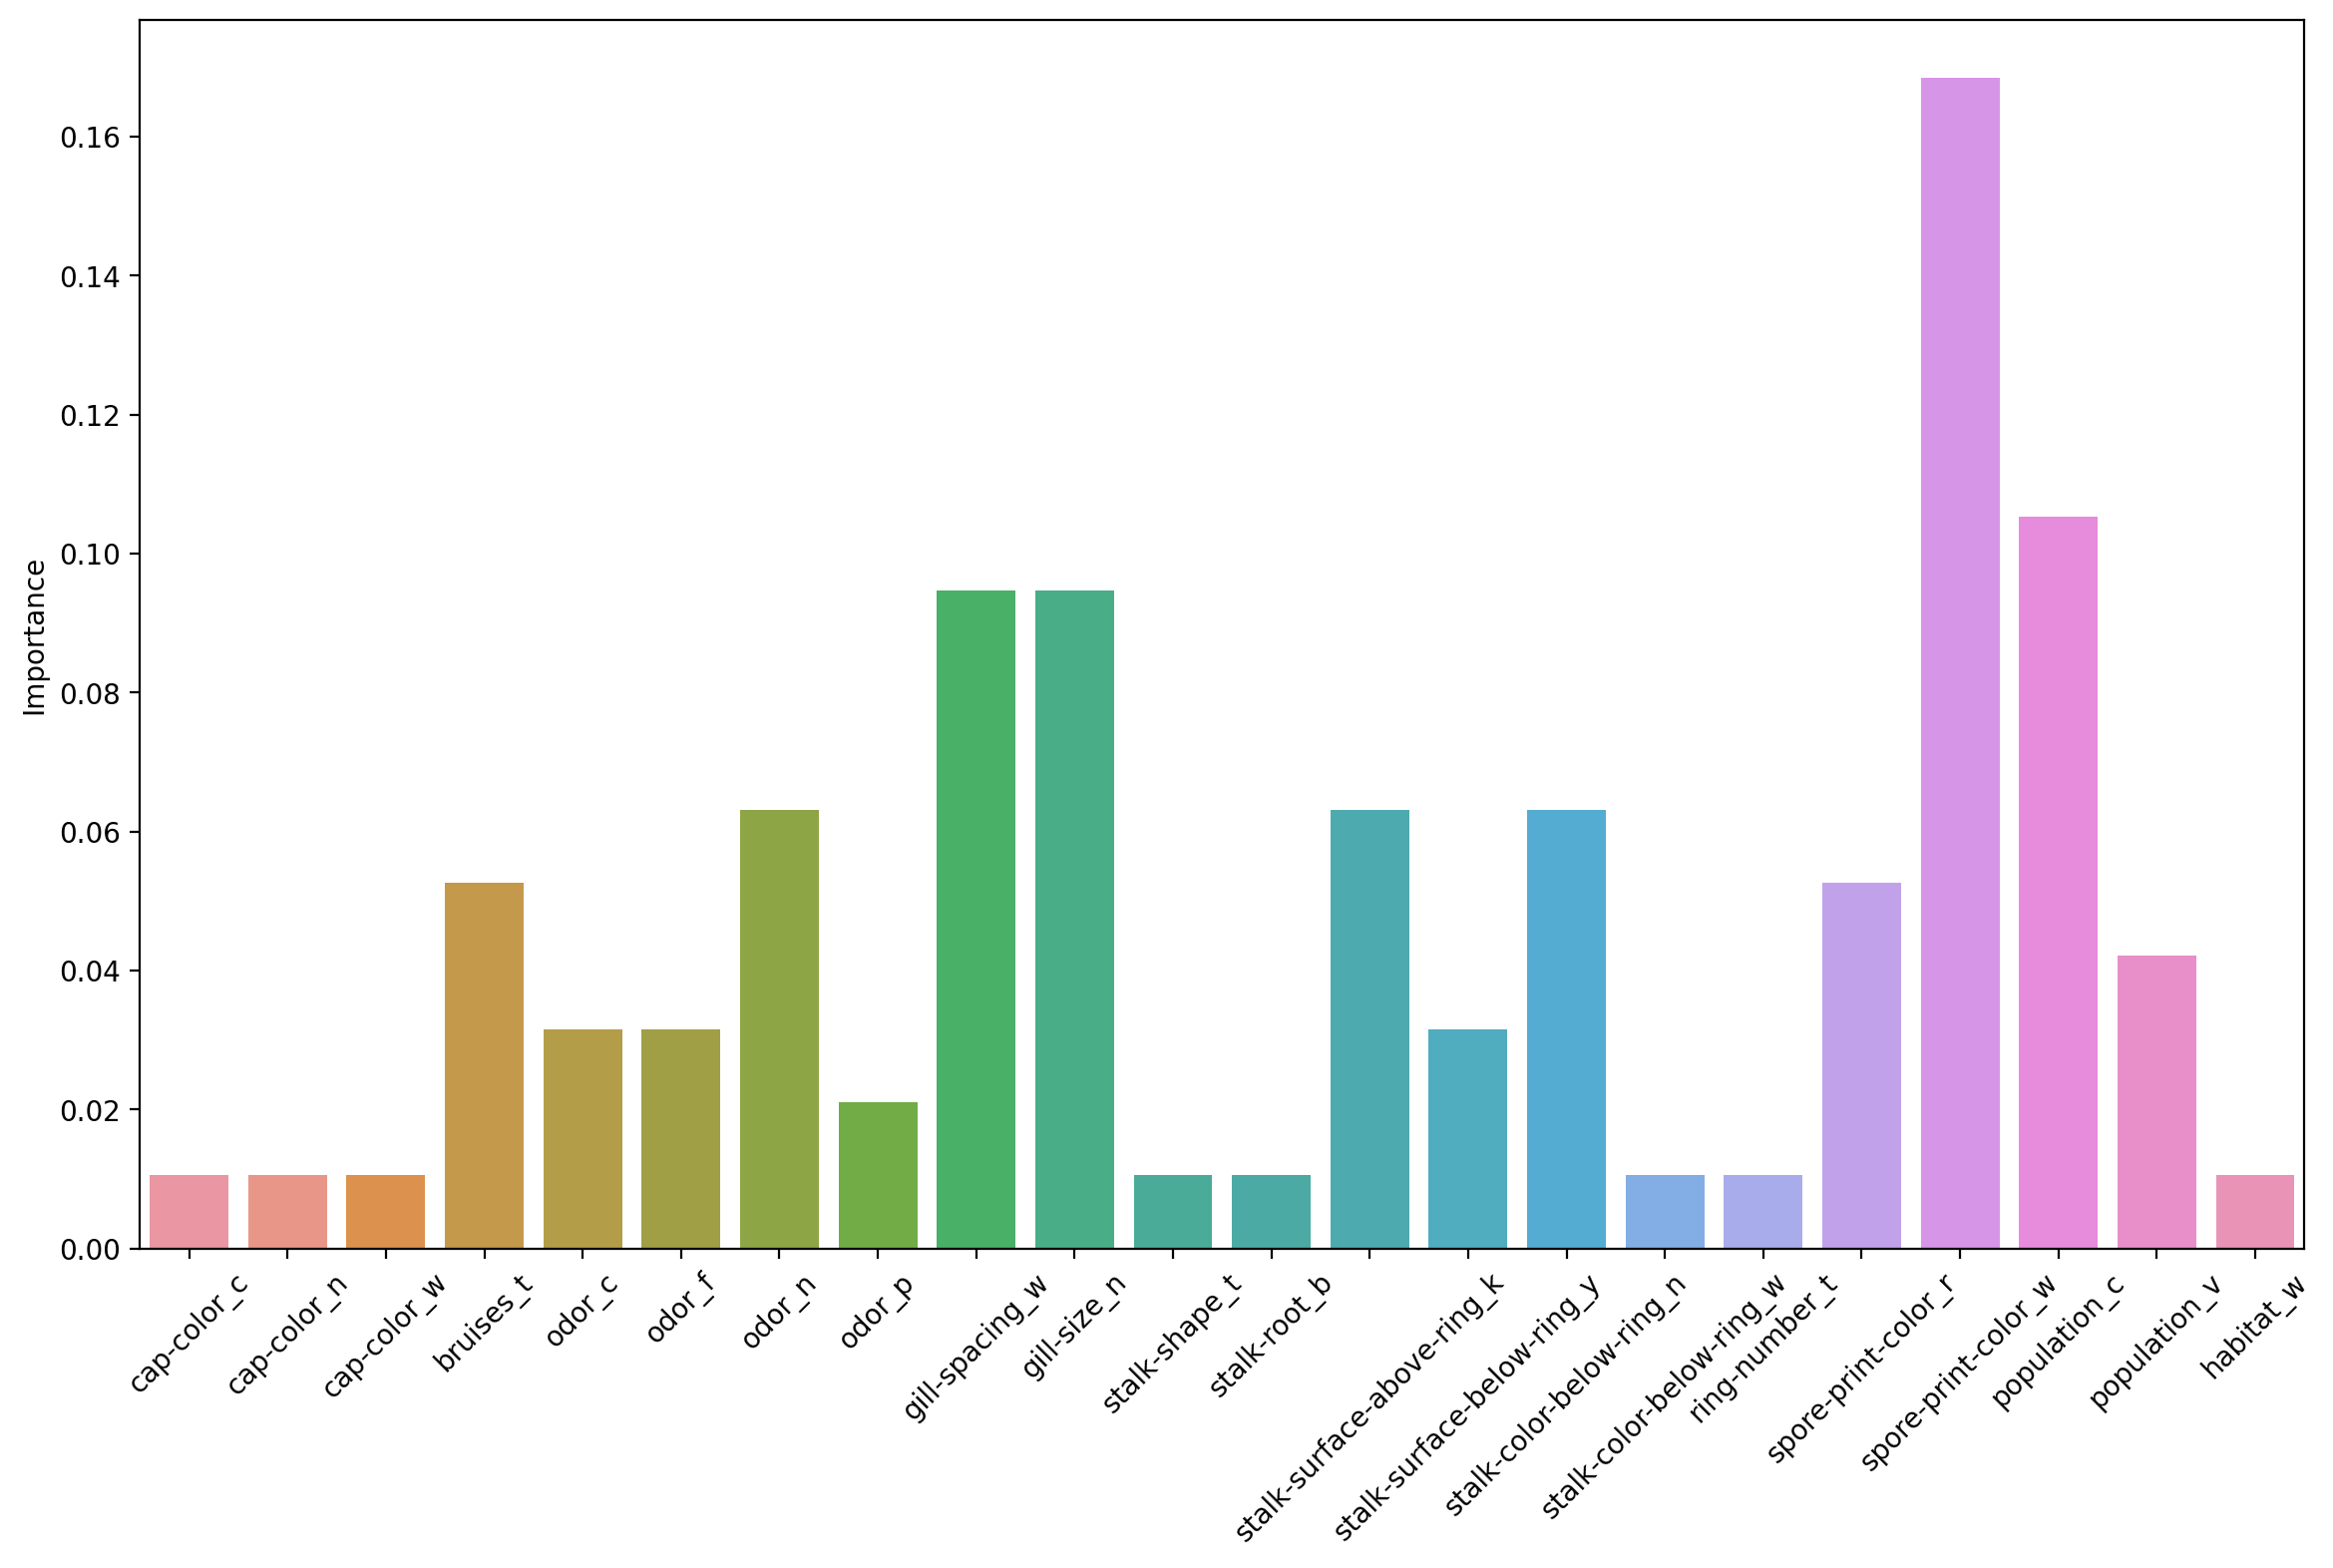

In [51]:
plt.figure(figsize=(14,8),dpi=200)
sns.barplot(data=imp,x=imp.index,y='Importance')
plt.xticks(rotation=45)

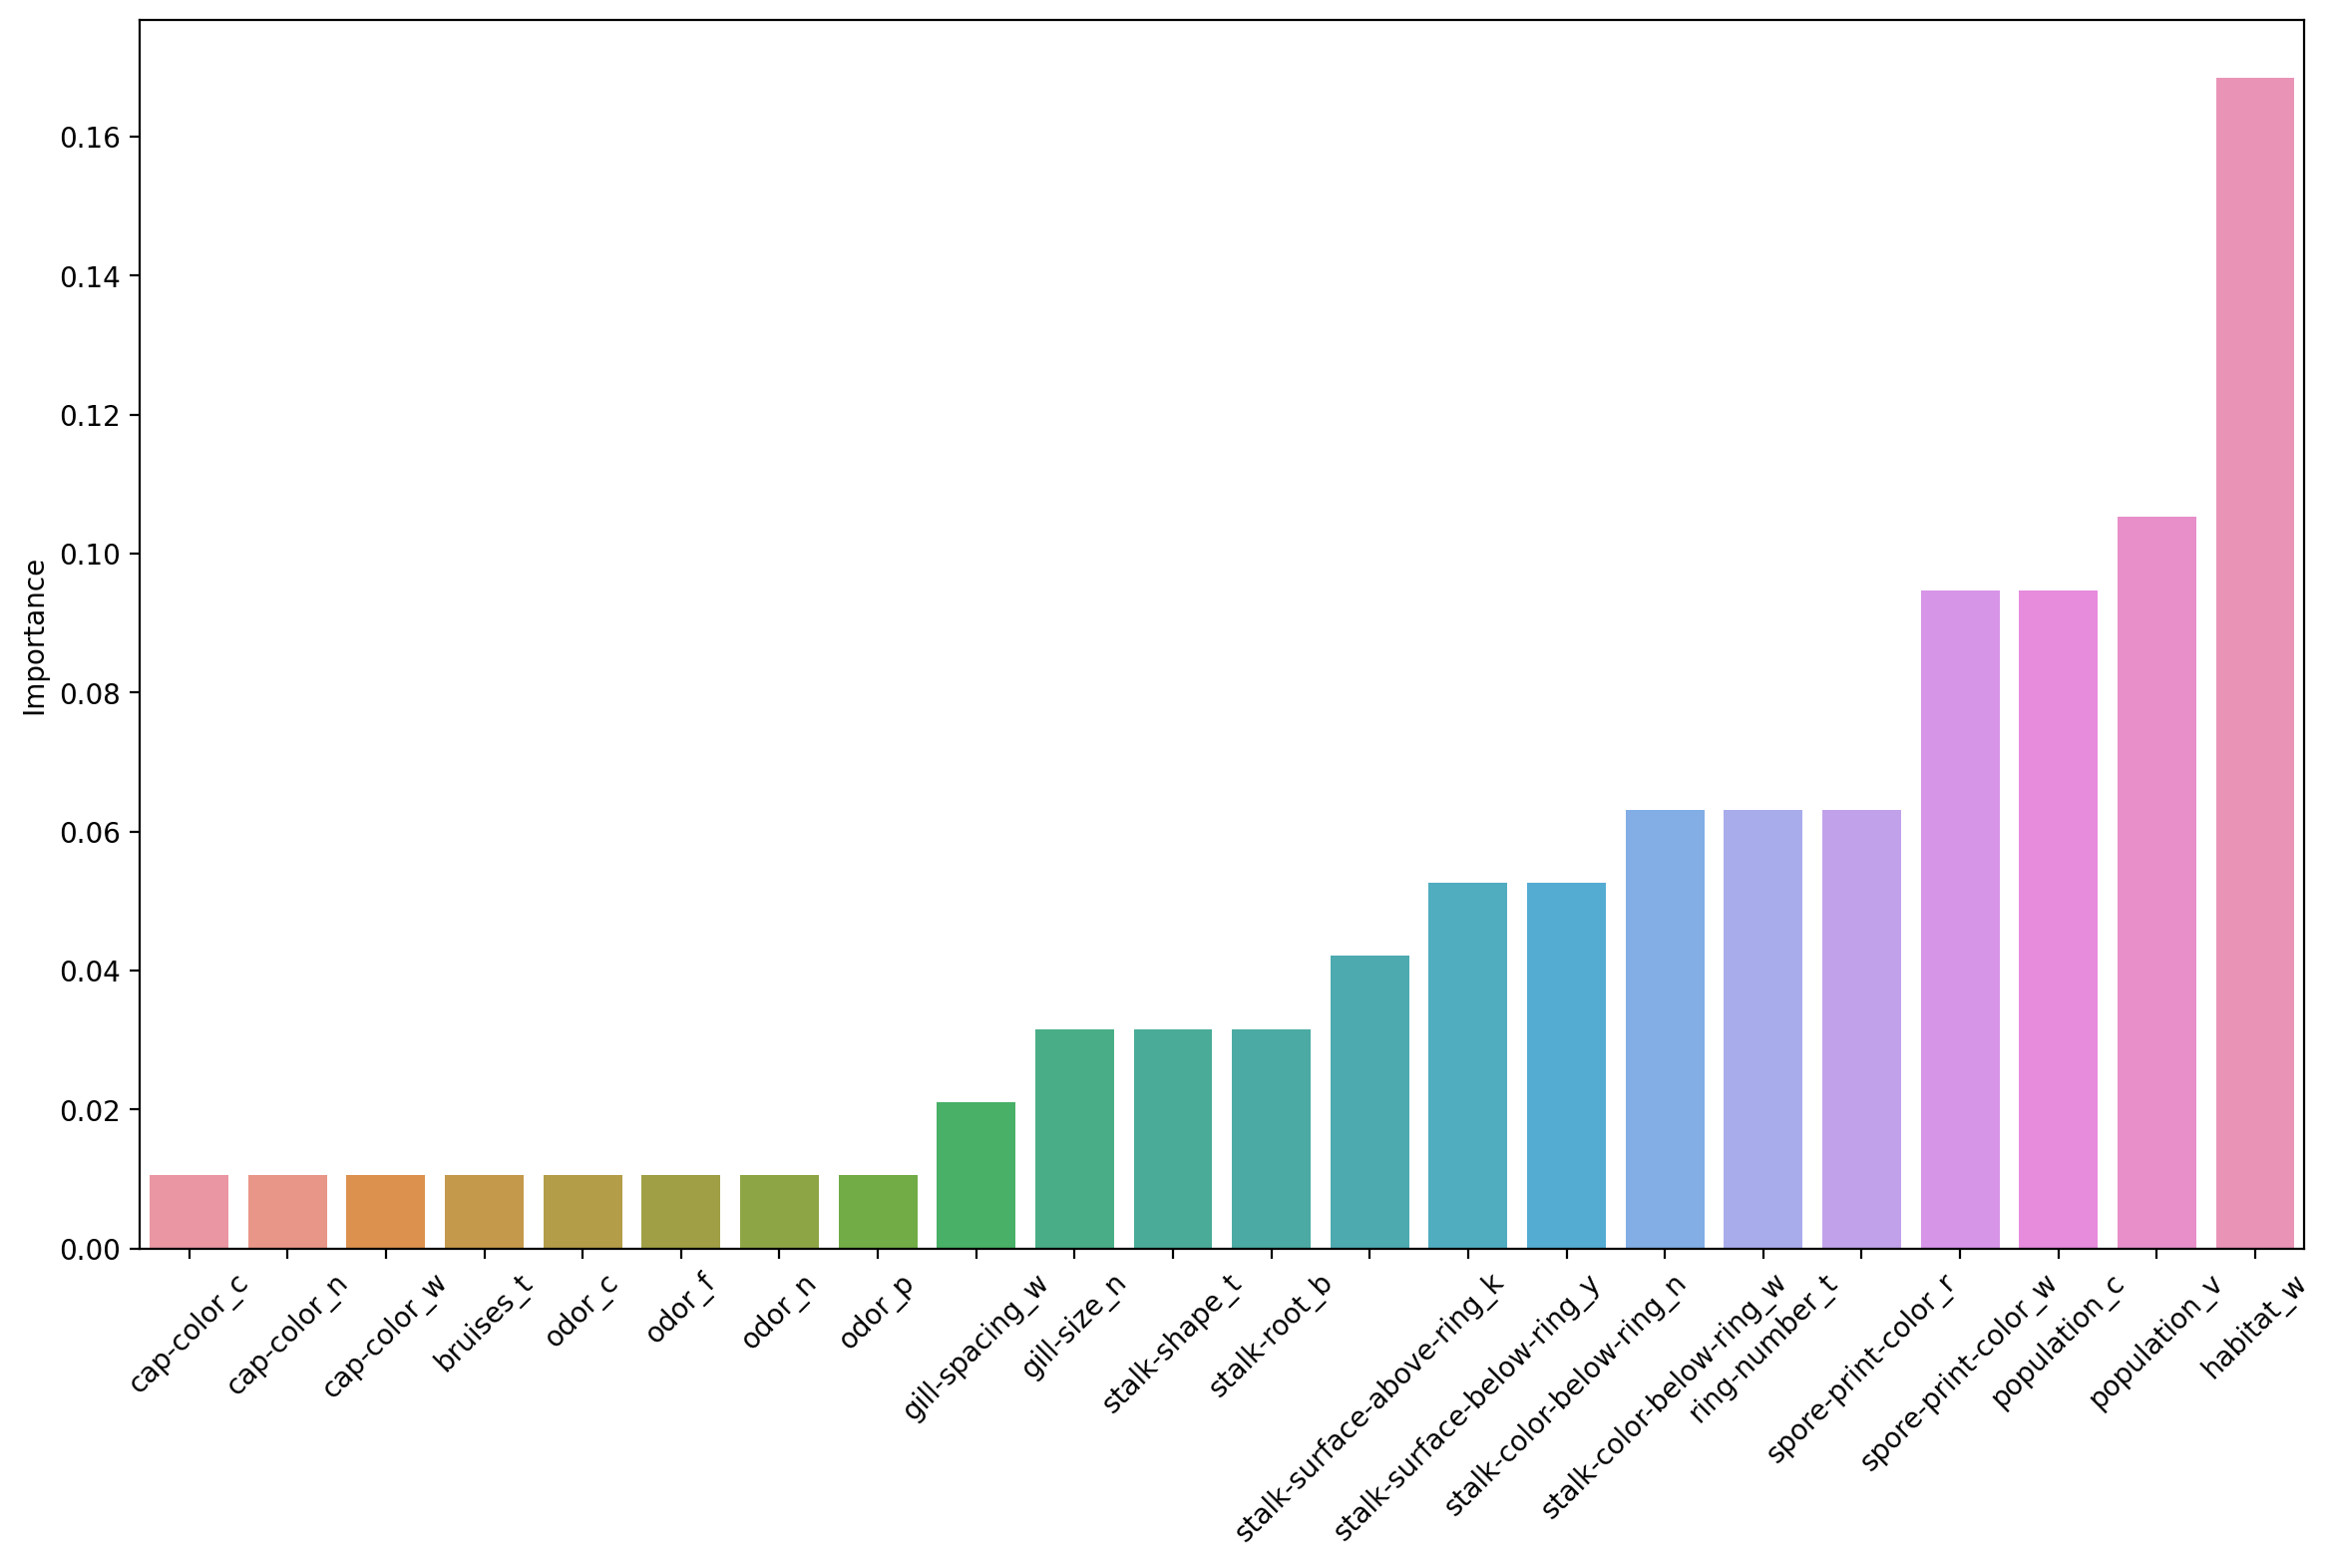

In [53]:
plt.figure(figsize=(14,8),dpi=200)
sns.barplot(data=imp.sort_values('Importance'),x=imp.index,y='Importance')
plt.xticks(rotation=45);